# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
from api_keys import g_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



603


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1



print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : tasiilaq
Processing Record 2 of Set 1 : thompson
Processing Record 3 of Set 1 : mataura
Processing Record 4 of Set 1 : san patricio
Processing Record 5 of Set 1 : yellowknife
Processing Record 6 of Set 1 : vaini
Processing Record 7 of Set 1 : cherskiy
Processing Record 8 of Set 1 : severo-kurilsk
Processing Record 9 of Set 1 : hobart
Processing Record 10 of Set 1 : saskylakh
Processing Record 11 of Set 1 : new norfolk
Processing Record 12 of Set 1 : durango
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : spring valley
Processing Record 15 of Set 1 : albany
Processing Record 16 of Set 1 : bengkulu
Processing Record 17 of Set 1 : geraldton
Processing Record 18 of Set 1 : ushuaia
Processing Record 19 of Set 1 : port alfred
Processing Record 20 of Set 1 : qianan
Processing Record 21 of Set 1 : longyearbyen
Processing Record 22 of Set 1 : cape town
Processing Record 23 of Set 

City not found. Skipping...
Processing Record 32 of Set 4 : iquitos
Processing Record 33 of Set 4 : tarko-sale
Processing Record 34 of Set 4 : ligayan
Processing Record 35 of Set 4 : aykhal
Processing Record 36 of Set 4 : port hedland
City not found. Skipping...
Processing Record 37 of Set 4 : victoria
Processing Record 38 of Set 4 : havre-saint-pierre
Processing Record 39 of Set 4 : sabang
Processing Record 40 of Set 4 : baoshan
Processing Record 41 of Set 4 : makushino
Processing Record 42 of Set 4 : rudnogorsk
Processing Record 43 of Set 4 : ust-nera
Processing Record 44 of Set 4 : ejido
Processing Record 45 of Set 4 : sitka
Processing Record 46 of Set 4 : ostersund
Processing Record 47 of Set 4 : guantanamo
Processing Record 48 of Set 4 : airai
Processing Record 49 of Set 4 : yumen
Processing Record 50 of Set 4 : talcahuano
City not found. Skipping...
Processing Record 0 of Set 5 : lebu
Processing Record 1 of Set 5 : manadhoo
Processing Record 2 of Set 5 : erzin
Processing Record 3

Processing Record 12 of Set 8 : dunedin
Processing Record 13 of Set 8 : svetlaya
Processing Record 14 of Set 8 : necochea
City not found. Skipping...
Processing Record 15 of Set 8 : prince rupert
Processing Record 16 of Set 8 : zemio
Processing Record 17 of Set 8 : urucara
Processing Record 18 of Set 8 : port blair
Processing Record 19 of Set 8 : constitucion
Processing Record 20 of Set 8 : vengerovo
Processing Record 21 of Set 8 : sangar
Processing Record 22 of Set 8 : maniitsoq
Processing Record 23 of Set 8 : narasannapeta
Processing Record 24 of Set 8 : freeport
Processing Record 25 of Set 8 : marsaxlokk
Processing Record 26 of Set 8 : deputatskiy
City not found. Skipping...
Processing Record 27 of Set 8 : saint-leu
Processing Record 28 of Set 8 : sonepur
Processing Record 29 of Set 8 : lima
Processing Record 30 of Set 8 : puri
Processing Record 31 of Set 8 : florence
Processing Record 32 of Set 8 : hami
Processing Record 33 of Set 8 : channel-port aux basques
Processing Record 34 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a datamframe 
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Longitude" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed
0,Tasiilaq,40,GL,1619324101,60,65.6145,-37.6368,41.00,13.80
1,Thompson,75,CA,1619324111,54,55.7435,-97.8558,24.80,3.44
2,Mataura,34,NZ,1619324250,74,-46.1927,168.8643,46.99,10.00
3,San Patricio,1,US,1619324256,64,28.0170,-97.5169,77.00,11.50
4,Yellowknife,20,CA,1619324074,57,62.4560,-114.3525,15.01,12.66
...,...,...,...,...,...,...,...,...,...
537,Blackfoot,97,US,1619324746,75,43.1905,-112.3450,48.00,7.00
538,Great Falls,90,US,1619324747,93,47.5002,-111.3008,36.00,8.05
539,Shizuishan,36,CN,1619324748,31,39.2333,106.7694,57.87,4.54
540,Muhos,75,FI,1619324748,75,64.8080,25.9931,35.60,12.66


In [ ]:
weather_df.to_csv(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\cities.csv", index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

From the above table, no cities showed a humidity greater than 100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

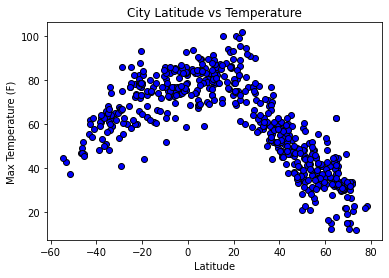

In [7]:
#Create Latitude v Temperature Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Max Temperature (F)")

#Title
plt.title("City Latitude vs Temperature")

#Save the plotted figure as png 
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\City Latitude vs Max Temperature.png")

The scatter plot shows the highest temperature is located at 0 latitude

## Latitude vs. Humidity Plot

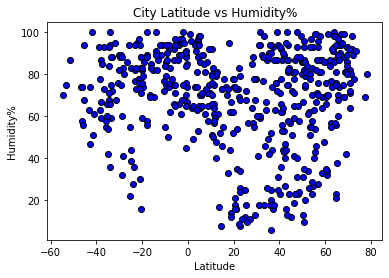

In [8]:
#Create Latitude v Humidity Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Humidity%")

#Title
plt.title("City Latitude vs Humidity%")

#Save the plotted figure as png 
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Latitude v Humidity.png")

The plot does not really show a correlation between latitude and humidity 

## Latitude vs. Cloudiness Plot

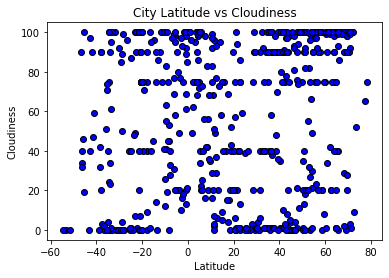

In [9]:
#Create Latitude v Cloudiness Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Cloudiness")

#Title
plt.title("City Latitude vs Cloudiness")


plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Latitude v Cloudiness.png")

The scatterplot does not really show a correlation between cloudiness and latttiude 

## Latitude vs. Wind Speed Plot

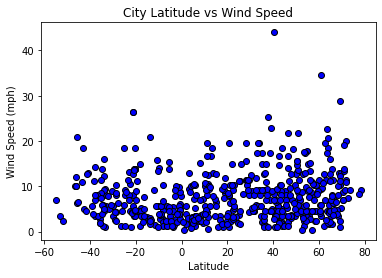

In [10]:
#Create Latitude v Cloudiness Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Wind Speed (mph)")

#Title
plt.title("City Latitude vs Wind Speed")


plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Latitude v Wind Speed.png")

In [ ]:
The plot shows the average wind speed seems to be around 

## Linear Regression

In [11]:
#Create DF's for nothern and southern 
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

#Line regression & Plot
# can use st.pearsonr from scipy stats to calculate linear regression
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Annotation for linear regression 

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="green")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.89


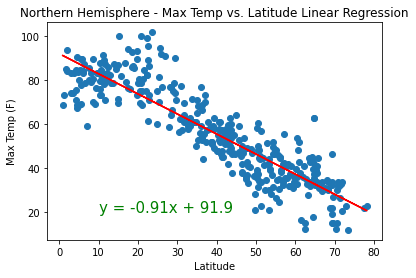

In [12]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# use annotate function 
annotate(equation, 10,20)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In the nothern hemisphere, as you shift from the equator the temperature increases 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.71


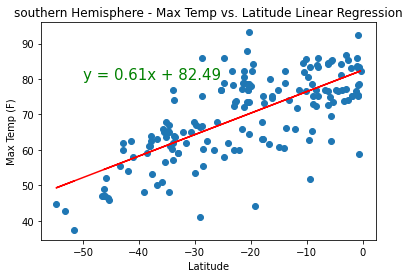

In [13]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# use annotate function 
annotate(equation, -50,80)

# Set a title
plt.title("southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The plot shows as you shift towards the equator the temperature increases 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.14


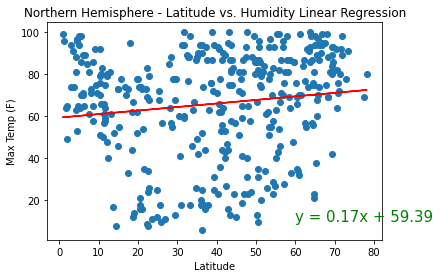

In [14]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# use annotate function 
annotate(equation, 60,10)

# Set a title
plt.title("Northern Hemisphere - Latitude vs. Humidity Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The plot does not really show a correlation between humidity and latitude 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.23


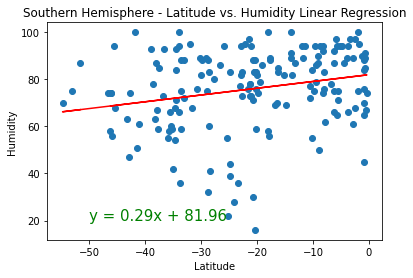

In [15]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# use annotate function 
annotate(equation, -50,20)

# Set a title
plt.title("Southern Hemisphere - Latitude vs. Humidity Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The plot does not really show a correlation between humidity and latitude 

The r-squared is : 0.19


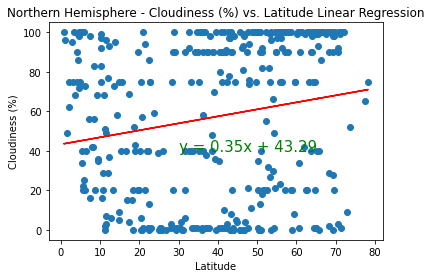

In [16]:

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# use annotate function 
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The plot does not really show a correlation between cloudiness and latitude 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.23


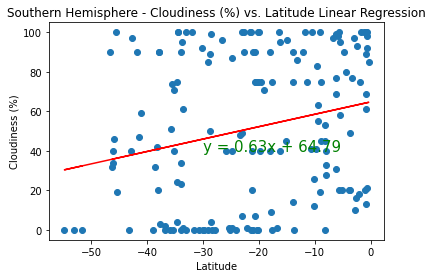

In [17]:

equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
# use annotate function 
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The plot does not really show a correlation between cloudiness and latitude 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.16


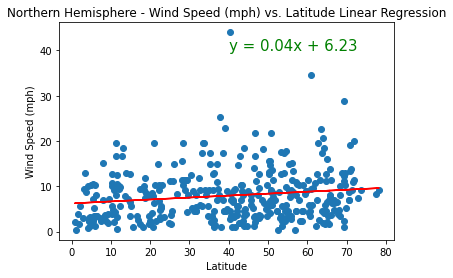

In [20]:

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
# use annotate function 
annotate(equation, 40,40)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The plot does not really show a correlation between wind speed and latitude 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.22


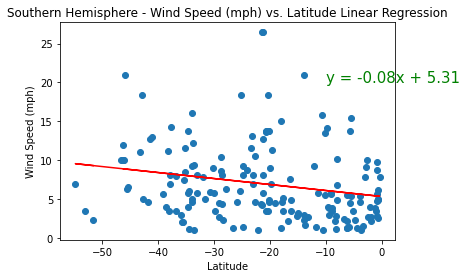

In [19]:

equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# use annotate function 
annotate(equation, -10, 20)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Southern Hemisphere - wind speed vs. Latitude Linear Regression.png")

The plot does not really show a correlation between wind speed and latitude 